In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pandas_summary import DataFrameSummary
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.imports import *
from fastai.tabular import *

In [4]:
df_raw = pd.read_csv('Train_bulldozer2.csv', low_memory=False, parse_dates=["saledate"])

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


**SalePrice is our dependent variable. Lets see states**

In [7]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

**We can see couple of missing value indication.**

In [9]:
df_raw.shape

(401125, 53)

**As we are interested with sales price and also we are interested with ratios not differences, hence we'll use log**

In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [11]:
?df_raw.drop # checking what drop function does. Double question mark will show source code

In [12]:
df_raw.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

**We need to deal with time series. There are weeks, days, hours, end of month, end of year and many more exceptional cases where sales price may be varied and effected by date-time**

In [13]:
add_datepart

<function fastai.tabular.transform.add_datepart(df, fldname, drop=True, time=False)>

In [14]:
?add_datepart

In [15]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

**We tried to fit model. But there are some contineous variables like saleprice and some are categorical variables. These categorical variables are to be shown in numerical data as we are working with a dependent variable which is numeric i.e contineous and hence , we will deal with regression problem **

In [16]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [17]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


**add_datepart has fixed our problem. Now we have all date-time entities with an efficient code.** 

**The categorical variables are all currently strings, which is not very efficient. The following function converts them to pandas categories.**

In [18]:
def convert_cats(df):
    for i, j in df.items():
        if pd.api.types.is_string_dtype(j):
            df[i] = j.astype('category').cat.as_ordered()

In [19]:
convert_cats(df_raw)

**We can specify the order to use for categorical variables if we wish:**

In [20]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

**There is mis-match. As we categorize usually with Low, medium and high.**

In [21]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [22]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

**Categorization order problem has been fixed now**

In [23]:
# Making codes of all these categories i.e value of 1,2 ,3 etc
df_raw.UsageBand = df_raw.UsageBand.cat.codes

### Lets fix missing value problem now

In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   401125 non-null int8
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGroup

In [25]:
import missingno as msno

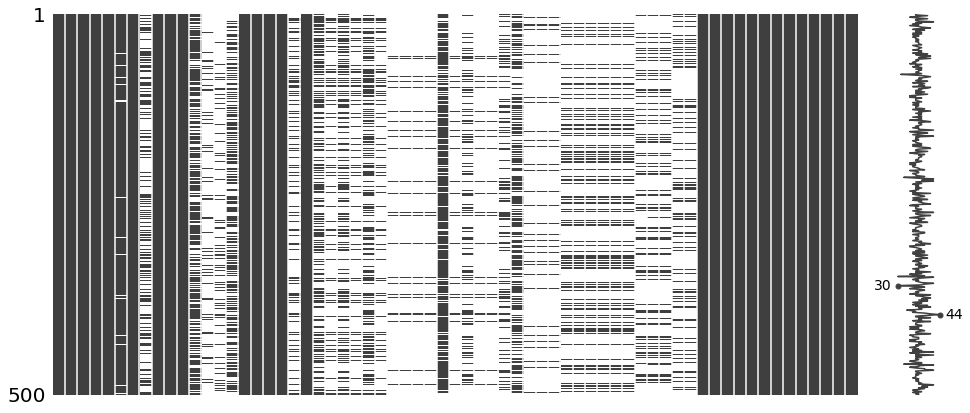

In [26]:
msno.matrix(df_raw.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

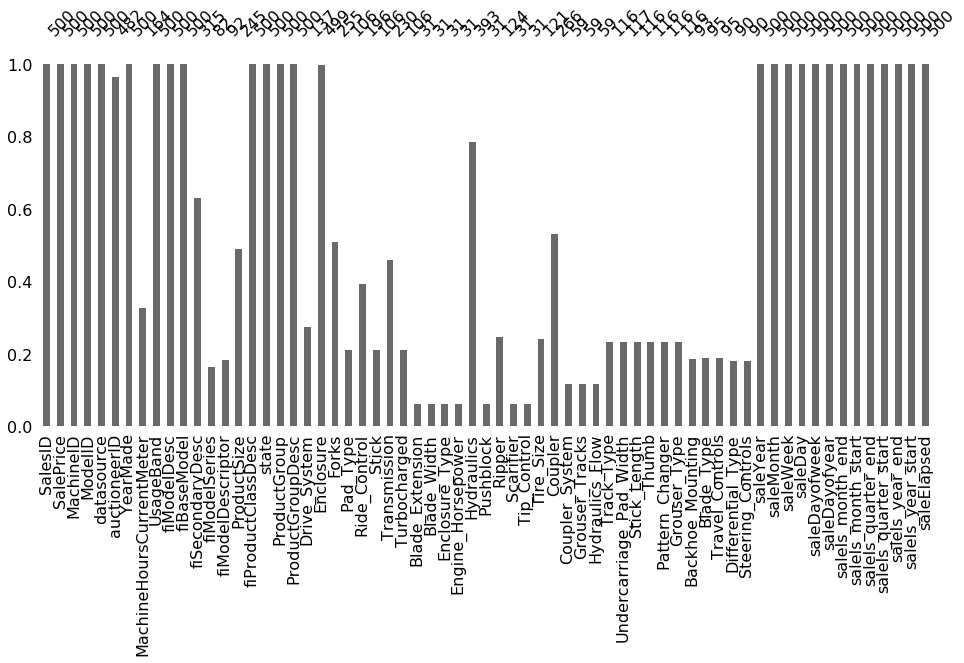

In [27]:
msno.bar(df_raw.sample(500),
            figsize=(16, 7),)

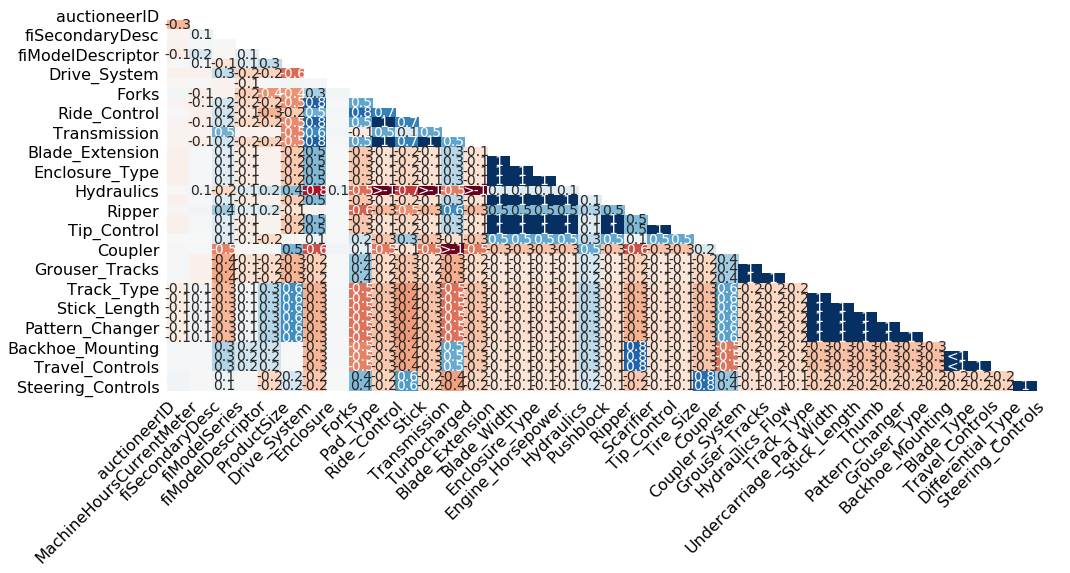

In [28]:
msno.heatmap(df_raw.sample(500),
            figsize=(16, 7),)

In [29]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col) # sets boolean to na's in col and adds to df
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [30]:
# Convert strings into numbers
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat == None or col.nunique() > max_n_cat):
        df[name] = col.cat.codes + 1

In [31]:
# Permutation is done by get_sample
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [32]:
# fast ai's proc_df function to split off response variable and change df to entirely numeric
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: 
        ignore_flds=[]
    if not skip_flds: 
        skip_flds=[]
    if subset: 
        df = get_sample(df,subset)
    else: 
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: 
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: 
        na_dict = {}
    else: 
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): 
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: 
        mapper = scale_vars(df, mapper)
    for n,c in df.items(): 
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: 
        res = res + [mapper]
    return res

In [33]:
# Problem fixing function of proc_df as by fastai
df, y, nas = proc_df(df_raw, 'SalePrice')

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
type(y)

numpy.ndarray

In [36]:
type(nas)

dict

In [37]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(df, y)
model.score(df,y)

0.9830744484376308

** This is our R-squared value. R-squared is a statistical measure of how close the data are to the fitted regression line. ... 0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean**

## split into training and validation sets

** our data can lead to overfitting. A validation set helps diagnose this problem. **

In [38]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [39]:
X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

### Making rmse function

In [40]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [41]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## Fitting model again

In [42]:
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 23.3 s
[0.09067357326163154, 0.25466885337382006, 0.9828171069266636, 0.8841757118194523]


** RMSE Train= 0.090, RMSE valid= 0.25, R2 Train=0.98, R2 valid=0.89 **

**An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation R2 is only 0.88 whereas train R2 is 0.98. It means that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.**

## Single tree

In [43]:
model = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[0.5371269683343529, 0.5674541015387006, 0.3970396664995464, 0.42494490873724894]


**Very low values for R2**

In [44]:
#a bigger tree wuth depth greater than 3 i.e uptill end leaf node point.
model = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[8.58675118495947e-07, 0.3496749160492006, 0.999999999998459, 0.7816380657860081]


**The training set result looks great! But the validation set is worse than our original model. It was 0.88 and now it is 0.78. It is suggested to use bagging in random forests.**

# Bagging

In [45]:
# Using original model
model = RandomForestRegressor(n_jobs=-1) # by default n_estimator is 10
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 22.9 s
[0.09043168601123835, 0.24827177867414785, 0.9829086612519078, 0.8899214537962797]


In [46]:
preds = np.stack([t.predict(X_valid) for t in model.estimators_])

In [47]:
preds.shape

(10, 12000)

In [48]:
# Showing 1st col. of 10 predictions from each tree
preds[:,0]

array([9.21034 , 9.10498 , 9.259131, 9.392662, 9.21034 , 9.132379, 9.10498 , 9.10498 , 9.21034 , 9.159047])

In [49]:
# mean of all values 
np.mean(preds[:,0])

9.188917905789447

In [50]:
y_valid[0]

9.104979856318357

** Note how good mean value is and how bad is individual estimators are**

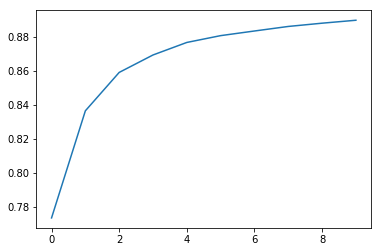

In [51]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check that with random changing values of hyper parameter. 

### Randomly changing hyper-parameters

In [52]:
model = RandomForestRegressor(n_estimators=10 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 22.3 s
[0.09042101427939231, 0.25073194997091264, 0.9829126948695478, 0.8877290673326824]


**Exact same result as we expected. Both commands are same**

In [53]:
model = RandomForestRegressor(n_estimators=20 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 37.9 s
[0.08247206057047289, 0.2391118267988226, 0.9857849458880298, 0.8978942760554928]


**Not much improvement though. Let's increase value of hyper-parametre**

In [54]:
model = RandomForestRegressor(n_estimators=40 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 1min 13s
[0.0784577668544978, 0.23888219237838682, 0.9871350912137931, 0.8980902992320249]


In [55]:
model = RandomForestRegressor(n_estimators=80 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 2min 18s
[0.07614089238898955, 0.23594539872617443, 0.9878836795437704, 0.9005806318309124]


# Out of bag score

In [56]:
model = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 1min 20s
[0.07834633201076235, 0.23604376983182365, 0.9871716097402724, 0.9004977140713335, 0.9084226186369039]


**our validation set time difference is making an impact**

# Using SUBSAMPLING technique
To speed up and reduce overfitting, we use this approach

In [57]:
# Speed up: We have been using whole dataset. This takes more processing time and competing power. We can reduce this Wall time.
def set_rf_samples(n):
    """Changes scikit learn's random forests giving each tree a random sample of n random rows
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
                                      forest.check_random_state(rs).randint(0, n_samples, n))
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
                                    forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [58]:
set_rf_samples=20_000

In [59]:
model=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

Wall time: 1min 20s
[0.07855596845206861, 0.23633885259105164, 0.98710286635488, 0.9002487792087247, 0.9082409932258242]


In [60]:
model=RandomForestRegressor(n_estimators=40,max_features=0.5,min_samples_leaf=3,n_jobs=-1,oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

Wall time: 39.2 s
[0.1190772968174235, 0.22826992804700463, 0.9703658305170226, 0.9069437863018825, 0.9116017283464619]


**Result:<br> So the final validation score of 0.2322 was very good when compared to the leaderboard results on kaggle for the same competition.**